<a href="https://colab.research.google.com/github/2303A52291/Explainable-AI-lab-practical/blob/main/EXPLAINABLE_AI_Lab_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Q. No.1 Question Expected Time
to complete
1 Green Cycle – E-Bike Company
 Context:
 Green Cycle tracks how many social media reels affect demo test ride bookings.
Instagram Reels (x) Test Rides (y)
1 20
2 35
3 48
1 25
2 38
 Objective:
 Analyze the effect of Instagram reel postings on the number of test ride bookings for
Green Cycle by performing Linear Regression and interpreting SHAP values.
 Requirements:
1. Perform Linear Regression Analysis
o Use the given dataset where:
• Independent Variable (x): Instagram Reels
• Dependent Variable (y): Test Rides
2. Calculate the Baseline Value
o Compute the mean of all test ride values (y values).
3. Calculate SHAP Values
o For each record, calculate the difference between the predicted value and the baseline.
o This difference is the SHAP value, attributed to the number of Instagram reels.
4. Compute Final Prediction
o Use the linear regression model to calculate predicted test rides for each reel count.
o Confirm that:
Final Prediction = Baseline + SHAP Value
5. Interpret the Results
o Explain how the number of Instagram reels influenced each predicted test ride count.
o Compare the predicted value to the actual value for each row.
o Identify under prediction or over prediction, and provide reasoning.

Deliverables:
 A notebook or document containing:
 • Linear regression implementation with coefficients
 • Baseline (mean of y)
 • Table of SHAP values and predictions
 • Explanation of how each input influenced the prediction
 • Comparison of predicted vs actual values, with over/under prediction notes
 • Summary analysis covering:
 ◦ Accuracy of the model
 ◦ Trend analysis
 ◦ SHAP interpretation insights


In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
#1. Dataset
data_q1 = pd.DataFrame({
    "Reels": [1, 2, 3, 1, 2],
    "Test_Rides": [20, 35, 48, 25, 38]
})
# Independent & Dependent Variables
X = data_q1[['Reels']]
y = data_q1['Test_Rides']
# 2 Train Linear Regression Model
model = LinearRegression()
model.fit(X, y)
coef = model.coef_[0]
intercept = model.intercept_
print(f" Regression Equation: Test_Rides = {intercept:.2f} + {coef:.2f} * Reels")
# 3 Predictions
data_q1['Predicted'] = model.predict(X)

# 4 Baseline (mean of y)

baseline = y.mean()
print(f" Baseline Value (mean Test_Rides): {baseline:.2f}")
# 5 SHAP Values (Manual Calculation)
data_q1['SHAP'] = data_q1['Predicted'] - baseline
# Validation: Predicted = Baseline + SHAP
data_q1['Check'] = baseline + data_q1['SHAP']
# 6 Over/Under Prediction

data_q1['Prediction_Type'] = np.where(
    data_q1['Predicted'] > data_q1['Test_Rides'],
    'Overprediction',
    'Underprediction'
)

# 7  Display Results

print("\n Results Table:")
print(data_q1)

# 8 Model Accuracy Metrics

r2 = r2_score(y, data_q1['Predicted'])
rmse = np.sqrt(mean_squared_error(y, data_q1['Predicted']))

print(f"\n Model R²: {r2:.4f}")
print(f" RMSE: {rmse:.4f}")


# 9  Interpretation

print("\n Interpretation:")
print(f"- The coefficient ({coef:.2f}) means that each additional Instagram reel is associated with about {coef:.2f} more test rides.")
print(f"- Baseline value ({baseline:.2f}) is the average number of rides without considering reel effect.")
print("- SHAP values show how much each reel count moved the prediction away from the baseline.")
print("- Overprediction occurs when actual engagement is lower than expected; underprediction occurs when actual engagement exceeds expectations.")


 Regression Equation: Test_Rides = 9.93 + 12.93 * Reels
 Baseline Value (mean Test_Rides): 33.20

📊 Results Table:
   Reels  Test_Rides  Predicted       SHAP      Check  Prediction_Type
0      1          20  22.857143 -10.342857  22.857143   Overprediction
1      2          35  35.785714   2.585714  35.785714   Overprediction
2      3          48  48.714286  15.514286  48.714286   Overprediction
3      1          25  22.857143 -10.342857  22.857143  Underprediction
4      2          38  35.785714   2.585714  35.785714  Underprediction

 Model R²: 0.9614
 RMSE: 1.9383

 Interpretation:
- The coefficient (12.93) means that each additional Instagram reel is associated with about 12.93 more test rides.
- Baseline value (33.20) is the average number of rides without considering reel effect.
- SHAP values show how much each reel count moved the prediction away from the baseline.
- Overprediction occurs when actual engagement is lower than expected; underprediction occurs when actual engageme

##2 GoFit – Gym Membership Signups using Multiple Linear
Regression and SHAP Analysis
Objective:
Analyze how trainer availability and advertising spend influence new gym membership signups using
Multiple Linear Regression and interpret results using SHAP values.
Given Dataset:
Trainer
s (x₁)
Ad Spend
(k₹) (x₂)
Signu
ps (y)
5 50 80
4 40 70
6 60 90
3 30 60
2 20 50
Tasks:
1. Perform Multiple Linear Regression Analysis
o Use Trainers and Ad Spend as independent variables
o Use Signups as the dependent variable
2. Calculate the Baseline Value
o Compute the mean of all signup values
3. Calculate SHAP Values
o Calculate SHAP Value
o Distribute SHAP contributions between Trainers and Ad Spend based on model
coefficients
4. Compute Final Prediction for Each Record
o Use the regression equation
o Verify: Prediction = Baseline + SHAP (Trainers) + SHAP (Ad Spend)
5. Interpret the Results
o For each record, explain how trainers and ad spend affected the prediction
o Compare predicted vs actual signup values
o Indicate overprediction or underprediction and possible reasons

In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


# 1️ Dataset

data_q2 = pd.DataFrame({
    "Trainers": [5, 4, 6, 3, 2],
    "Ad_Spend": [50, 40, 60, 30, 20],
    "Signups": [80, 70, 90, 60, 50]
})

X = data_q2[['Trainers', 'Ad_Spend']]
y = data_q2['Signups']


# 2️ Train Multiple Linear Regression Model

model = LinearRegression()
model.fit(X, y)

coefs = model.coef_
intercept = model.intercept_
print(f" Regression Equation: Signups = {intercept:.2f} + {coefs[0]:.2f}*Trainers + {coefs[1]:.2f}*Ad_Spend")

# 3 Predictions

data_q2['Predicted'] = model.predict(X)


# 4 Baseline (mean of y)

baseline = y.mean()
print(f" Baseline Value (mean Signups): {baseline:.2f}")


# 5 SHAP Values (Manual Calculation)

# Total SHAP value per row
data_q2['Total_SHAP'] = data_q2['Predicted'] - baseline

# Distribute SHAP contributions based on coefficient magnitude
coef_sum = abs(coefs).sum()
data_q2['SHAP_Trainers'] = (abs(coefs[0]) / coef_sum) * data_q2['Total_SHAP'] * np.sign(coefs[0])
data_q2['SHAP_Ad_Spend'] = (abs(coefs[1]) / coef_sum) * data_q2['Total_SHAP'] * np.sign(coefs[1])


# 6️ Validation: Prediction = Baseline + SHAP_Trainers + SHAP_Ad_Spend

data_q2['Check'] = baseline + data_q2['SHAP_Trainers'] + data_q2['SHAP_Ad_Spend']

# 7️ Over/Under Prediction

data_q2['Prediction_Type'] = np.where(
    data_q2['Predicted'] > data_q2['Signups'],
    'Overprediction',
    'Underprediction'
)

# 8 Display Results

print("\n Results Table:")
print(data_q2)


# 9️ Model Accuracy Metrics

r2 = r2_score(y, data_q2['Predicted'])
rmse = np.sqrt(mean_squared_error(y, data_q2['Predicted']))

print(f"\n Model R²: {r2:.4f}")
print(f" RMSE: {rmse:.4f}")

# 10 Interpretation

print("\n Interpretation:")
print(f"- Each extra trainer adds about {coefs[0]:.2f} signups on average, holding ad spend constant.")
print(f"- Each extra ₹1k in ad spend adds about {coefs[1]:.2f} signups on average, holding trainers constant.")
print("- Baseline represents the average signups without considering trainer/ad variations.")
print("- SHAP_Trainers shows how trainer count shifted predictions from the baseline.")
print("- SHAP_Ad_Spend shows how ad spend shifted predictions from the baseline.")
print("- Overprediction means the model expected more signups than actually occurred; underprediction means the reverse.")


 Regression Equation: Signups = 30.00 + 0.10*Trainers + 0.99*Ad_Spend
 Baseline Value (mean Signups): 70.00

 Results Table:
   Trainers  Ad_Spend  Signups  Predicted  Total_SHAP  SHAP_Trainers  \
0         5        50       80       80.0        10.0       0.909091   
1         4        40       70       70.0         0.0       0.000000   
2         6        60       90       90.0        20.0       1.818182   
3         3        30       60       60.0       -10.0      -0.909091   
4         2        20       50       50.0       -20.0      -1.818182   

   SHAP_Ad_Spend  Check  Prediction_Type  
0       9.090909   80.0  Underprediction  
1       0.000000   70.0  Underprediction  
2      18.181818   90.0  Underprediction  
3      -9.090909   60.0  Underprediction  
4     -18.181818   50.0  Underprediction  

 Model R²: 1.0000
 RMSE: 0.0000

 Interpretation:
- Each extra trainer adds about 0.10 signups on average, holding ad spend constant.
- Each extra ₹1k in ad spend adds about 0.99 sign

##3 Regression with Diabetes Dataset
Objective:
Understand how patient features influence disease progression using Multiple Linear Regression and
SHAP value analysis.
Tasks
1. Perform Multiple Linear Regression Analysis
• Use all available features from the Diabetes dataset as independent variables.
• Fit a Multiple Linear Regression model to predict disease progression.
2. Calculate the Baseline Value
• Compute the mean of the target variable (disease progression scores) from the training
data.
• This will serve as the baseline prediction.
3. Calculate SHAP Values
• Apply SHAP to compute feature contributions to each prediction.
• Use model coefficients to proportionally attribute the difference from the baseline to
each feature.
4. Compute Final Prediction for Each Record
• For every test record, verify that:
Prediction = Baseline + SHAP(Feature₁) + SHAP(Feature₂) + ... + SHAP(Featureₙ)
5. Interpret the Results
• For each patient record:
o Explain how each feature contributed to the predicted disease progression.
o Compare the predicted value vs the actual observed value.
o Comment on whether the model overpredicted or underpredicted and why,
based on SHAP values.



=== Model Performance ===
R² Score: 0.2550
RMSE: 0.4136

Baseline value (mean of y_train): 0.3469

=== SHAP Additivity Check ===
Sample 0: Predicted = 0.3355, SHAP Sum + Baseline = 0.3578
Sample 1: Predicted = 0.2381, SHAP Sum + Baseline = 0.2604
Sample 2: Predicted = 0.1511, SHAP Sum + Baseline = 0.1733

=== Prediction Explanations ===

Patient 1
Actual: 0.00, Predicted: 0.34 (Overpredicted)
Feature contributions:
  Pregnancies: 0.0296
  Glucose: -0.1440
  BloodPressure: 0.0265
  SkinThickness: 0.0068
  Insulin: -0.0265
  BMI: 0.0404
  DiabetesPedigreeFunction: 0.0007
  Age: 0.0773
Baseline: 0.35, Sum of SHAP: 0.0109, SHAP-based Prediction: 0.3578

Patient 2
Actual: 0.00, Predicted: 0.24 (Overpredicted)
Feature contributions:
  Pregnancies: -0.0122
  Glucose: -0.0651
  BloodPressure: -0.0123
  SkinThickness: 0.0063
  Insulin: 0.0264
  BMI: 0.0659
  DiabetesPedigreeFunction: -0.0307
  Age: -0.0648
Baseline: 0.35, Sum of SHAP: -0.0865, SHAP-based Prediction: 0.2604

Patient 3
Actual: 0

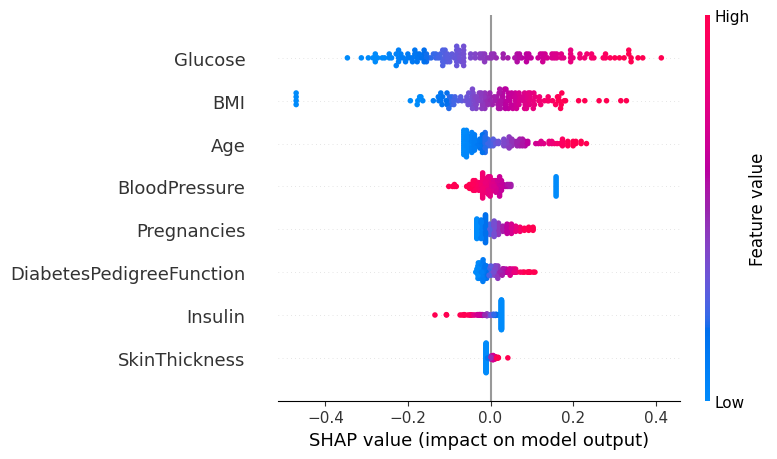

In [19]:
# 3) Regression with Diabetes Dataset

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import shap

# 1) Load dataset
df = pd.read_csv("/content/diabetes.csv")

# Assuming the last column is the target (disease progression)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2) Fit Multiple Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model metrics
print("\n=== Model Performance ===")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

# 3) Baseline value
baseline_value = np.mean(y_train)
print(f"\nBaseline value (mean of y_train): {baseline_value:.4f}")

# 4) SHAP value calculation (LinearExplainer is ideal for linear regression)
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Verify SHAP property for a few samples
print("\n=== SHAP Additivity Check ===")
for i in range(3):
    pred_calc = baseline_value + shap_values.values[i].sum()
    print(f"Sample {i}: Predicted = {y_pred[i]:.4f}, SHAP Sum + Baseline = {pred_calc:.4f}")

# 5) Detailed interpretation for each patient
print("\n=== Prediction Explanations ===")
for i in range(len(X_test)):
    actual = y_test.iloc[i]
    predicted = y_pred[i]
    shap_sum = shap_values.values[i].sum()
    pred_from_shap = baseline_value + shap_sum
    diff = predicted - actual
    status = "Overpredicted" if diff > 0 else "Underpredicted"

    print(f"\nPatient {i+1}")
    print(f"Actual: {actual:.2f}, Predicted: {predicted:.2f} ({status})")
    print("Feature contributions:")
    for feat, contrib in zip(X.columns, shap_values.values[i]):
        print(f"  {feat}: {contrib:.4f}")
    print(f"Baseline: {baseline_value:.2f}, Sum of SHAP: {shap_sum:.4f}, SHAP-based Prediction: {pred_from_shap:.4f}")

# Optional: SHAP Summary Plot
shap.summary_plot(shap_values.values, X_test, feature_names=X.columns)


##q no .4 Regression with Student Performance Dataset
Objective:
Investigate how student background and behavior influence final exam scores using Multiple Linear
Regression and SHAP value analysis.
Tasks
1. Perform Multiple Linear Regression Analysis
• Use all relevant student attributes (e.g., study time, parental education, absences, etc.)
as independent variables.
• Fit a regression model to predict the final exam score.
2. Calculate the Baseline Value
• Compute the mean of the final exam scores from the training set.
• This serves as the baseline prediction (expected value).
3. Calculate SHAP Values
• Use SHAP to compute the contribution of each student attribute to the final exam score
prediction.
• Distribute the prediction deviation from the baseline among the features.
4. Compute Final Prediction for Each Record
• For each student record, confirm:
Predicted Score = Baseline + SHAP(Feature₁) + SHAP(Feature₂) + ... + SHAP(Featureₙ)
5. Interpret the Results
• For every prediction:
o Explain how different features (e.g., study time, failures, health) impacted the
exam score.
o Compare predicted score to actual score.
o Comment on overprediction or underprediction and possible reasons behind i

Mean Squared Error: 4.082628398521859
R² Score: 0.9889832909573145


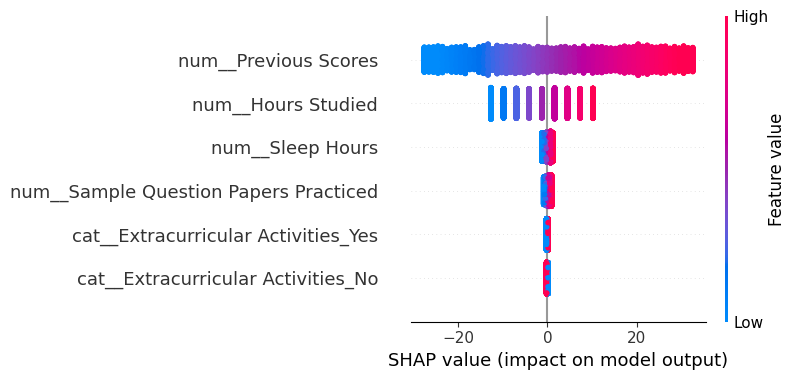

   Actual  Predicted  Predicted_Rounded
0 51.0000    54.7119            55.0000
1 20.0000    22.6155            23.0000
2 46.0000    47.9031            48.0000
3 28.0000    31.2898            31.0000
4 41.0000    43.0046            43.0000


In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import shap
import matplotlib.pyplot as plt


# 1. Load Dataset

df = pd.read_csv("/content/Student_Performance.csv")  # Change to your file path

target_col = "Performance Index"

if target_col not in df.columns:
    raise ValueError(f"Target column '{target_col}' not found. Available columns: {df.columns.tolist()}")


# 2. Features & Target

X = df.drop(columns=[target_col])
y = df[target_col]

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(exclude=['object']).columns.tolist()

# 3. Preprocessing

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)


# 4. Model Pipeline

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


# 5. Train/Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# 6. Train Model

model.fit(X_train, y_train)


# 7. Predictions

y_pred = model.predict(X_test)
y_pred_rounded = np.rint(y_pred)


# 8. Evaluation

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


# 9. SHAP Explainability

# Get transformed training data for SHAP
X_train_transformed = preprocessor.fit_transform(X_train)

explainer = shap.Explainer(model.named_steps['regressor'], X_train_transformed)
shap_values = explainer(X_train_transformed)

# Summary plot
shap.summary_plot(shap_values, X_train_transformed, feature_names=preprocessor.get_feature_names_out())


# 10. Optional: Compare Actual vs Predicted

results_df = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred,
    "Predicted_Rounded": y_pred_rounded
})
print(results_df.head())
